## Что такое ML

**Machine learning** - поиск связей с помощью машинных алгоритмов. Суть заключается в обучении математической модели с целью предсказать, классифировать, кластеризовать или уменьшить размерность данных.

Обучение может быть:

* **С учителем** - когда мы подаем на вход модели исторические данные, состоящие из набора признаков и целевой метрики. Обучение с учителем решает задачи:
  - Регрессии (предсказать значение по имеющимся признакам).
  - Классификации (определить класс объекта на основе признаков и целевой метрики)
* **Без учителя** - когда на выход подаются только признаки. Решает задачи:
  - Кластеризации (разбить набор данных на кластеры, которые содержать наиболее схожие данные)
  - Уменьшения размерности данных (можем использовать не миллионы данных, а например сотни тысячи - это сократит вычислительные затраты)
* **Обучение с подкреплением**.

**Модель** - система взаимосвязей между признаками и целевой переменной, или между наблюдениями, которая максимально близко отражает действительность.

Модель обучают на основе уже имеющихся наблюдений. Модели строятся на основе разных алгоритмов в зависимости от задачи, которую нужно решить.

Наблюдения (объекты) составляют матрицу объект-признак Х и вектор целевой переменной у. Они используются для обучения модели.

Для машинного обучения используют библиотеки: numpy, pandas, scikit-learn (sklearn)

In [ ]:
# Пример использования модели DecisionTreeClassifier - структура данных для классификации деревом решений.

# import the library

from sklearn.tree import DecisionTreeClassifier

# initiation the model

model = DecisionTreeClassifier()

# Теперь надо обучить модель, запустив алгоритм обучения.
# На вход модели подаем набор значений признаков Х и целевую переменную У.

y = df['target_var'] # выбрали вектор значений целевой переменной
X = df.drop(['target_var'], axis=1) # дропнули из таблицы вектор и оставили только матрицу признаков

# Для запуска обучения модели вызываем метод fit()

model.fit(X, y)

# Для построения прогнозов на основе наших данных, вызываем метод predict()

predictions = model.predict(X)

### Еще пример

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Читаем данные
fb = pd.read_csv('/datasets/dataset_facebook_cosmetics.csv', sep=';')

# Разделяем данные на признаки (матрица X) и целевую переменную (y)
y = fb['Total Interactions']
X = fb.drop('Total Interactions', axis=1)

# Задаём алгоритм для модели 
model = RandomForestRegressor()

# Обучаем модель
model.fit(X, y)

# Делаем прогноз обученной моделью
predictions = model.predict(X)

# Рисуем график прогноз-факт
sns.scatterplot(x=y, y=predictions, s=15, alpha=0.6)
plt.title('График Прогноз-Факт')
plt.ylabel('Прогноз')
plt.xlabel('Факт')
plt.show()


# Пример, конечно, синтетический, т.к. прогноз делали на тех же данных, на которых обучали модель. 
# Должно быть так: обучаем модель на исторических данных, а затем делаем прогноз на основе текущих, где целевая переменная еще неизвестна. *Это про задачу регрессии.

**Как оценить качество модели?**

Прежде чем передавать на вход модели реальные данные, нужно понять, хорошо ли она работает. Можно обучить модель, а со следующего месяца сравнивать её прогнозы с действительными целевыми переменными. Реальные данные, которые попадают на вход модели после её разработки, называют **тестовая выборка** (англ. test data). Однако перед тем как оценивать качество модели в бою, аналитики проверяют её работу на **валидационной выборке** (англ. validation data). 

Возьмём 150 000 наблюдений. Разделим их на две неравные части — например, на 100 и 50 тысяч. Передадим первую порцию данных в модель и подождём, пока алгоритм обучится на них. Затем предложим модели предсказать ответы для второй порции и сравним, насколько прогнозы совпадают с реальными значениями целевой переменной. 

Часть данных (100 тысяч), которую подают на вход модели при обучении, называют **обучающая выборка** (англ. train data). Те данные, на которых модель проверяют (50 тысяч), называют **валидационная выборка** (англ. validation data), или **отложенная**.

## Недообучение и переобучение

Когда мы обучаем модель и «подгоняем» веса на обучающей выборке, на каждом шаге проверяем, насколько близок ответ с подобранными весами тому, что есть на самом деле.
    
Так, ещё на этапе обучения модели, можно оценить ошибку — говорят, **«оценить ошибку на обучении»**. 

Подобрать веса для линейной модели или другого алгоритма так, чтобы для каждого наблюдения был правильный ответ, почти никогда не выходит. На части наблюдений всё равно получим ошибку. Её называют **ошибка на обучающей выборке**. В процессе обучения мы стараемся эту ошибку минимизировать. Если сделать это не удаётся и, скажем, сколько бы ни подбирали алгоритм, он работает лишь для половины наблюдений, значит модель **недообучилась**. Возникающую в таких случаях ошибку называют **ошибка смещения (англ. bias, «смещение»)**: ответы функции смещены относительно данных, потому что она не улавливает всех взаимосвязей. Вот отчего так бывает: 

* Слишком мало примеров или признаков;
* Слишком простая функция;
* Неверный подход к подбору разных вариантов искомой зависимости;

Такая модель будет давать одинаково плохие результаты и на обучающей, и на тестовой выборке. 

В идеальном случае модель (функция, алгоритм) должна не только редко ошибаться на обучении, но и хорошо работать на новых данных, которые она не «видела» при подгонке весов или поиске оптимальной зависимости. Говорят, что модели нужно иметь хорошую **обобщающую способность**. Тогда от применения машинного обучения будет польза. 


Будем честны: вы не пытались найти зависимости в данных и всего лишь зазубрили значения. Можно сказать, что ваша модель «идеальна», но лишь до тех пор, пока ей на вход не передадут значения признаков для новых объектов. Когда на валидационных данных модель даёт результаты значительно хуже, чем на обучающих, говорят, что она **переобучилась (англ. overfitting)**. Такую ошибку называют **ошибка разброса (англ. variance)**. Это значит, что модель слишком сильно подстраивается под данные с учётом их шума: при переобучении она учитывает не только действительные связи в данных, но и избыточную информацию.

_Переобучение: если перед тестом по электродинамике вы вместо изучения законов и формул зазубрили все задачи с ответами из решебника._

_Недообучение: вы не стали заучивать решебник и сосредоточились на формулах, но перепутали числитель и знаменатель в законе Ома._

## Разделение выборки на обучающую и валидационную

В быту аналитики часто называют валидационную выборку тестовой.

Руководитель может спросить: «Как там качество на тестовой выборке? Улучшилось?». И библиотеки в Python не отстают — функция, разделяющая выборку, называется **train_test_split() (англ. «разделение на обучающую и тестовую выборки»)**. Это может вводить в заблуждение, но не поддавайтесь панике: постарайтесь понять, что имеют в виду в каждом случае.

Как бы вы ни называли разделённые выборки, фундаментальными остаются два вопроса: 
 * **В каких пропорциях делить?** Часто делят в соотношении 80 к 20 или 70 к 30. Общее правило: обучающая выборка должна быть больше отложенной, но так, чтобы проверка метрик на тесте осталась обоснованной.
 * **Каким способом делить?** Вы ещё узнаете, что есть два способа делить выборку на обучающую и валидационную: по времени и случайно. Первый годится, когда более ранние наблюдения влияют на более поздние. Второй — когда временная структура не так важна для обучения модели.

In [ ]:
#  вызвать функцию train_test_split() из модуля model_selection библиотеки sklearn:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# По умолчанию train_test_split() делит выборку в этой пропорции случайным образом.
# random_state параметр устанавливет seed для random generator функции.

## Оценка качества модели

**Коэффициент детерминации, или R-квадрат**. Так называют часть дисперсии (изменчивости) целевой переменной, которую объясняет модель. Эта метрика принимает значения от 0 до 1 и показывает, насколько сделанный моделью прогноз отражает целевую переменную. Если модель объясняет идеально (делает максимально точный прогноз), значение коэффициента детерминации будет равно 1. А если модель прогнозирует из плохо, то R-квадрат = 0.

Формула R-квадрата:

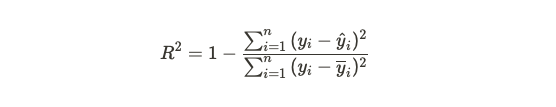

Выглядит как всегда пугающе, но смысл довольно простой. В числителе дроби суммарная квадратичная ошибка, поэтому если вы почти всегда даёте близкий прогноз, дробь будет равна 0, а значение метрики — 1.  В знаменателе суммарная разница между значением и средним. Это нужно, чтобы нормировать вашу ошибку на фактический разброс целевой переменной. Если вы сильно ошибаетесь, да и сама величина очень изменчивая, это немного скомпенсирует разницу между прогнозом и фактом.

Синтаксис R-квадрата (r2_score) простой — в качестве параметров вы передаёте реальный и спрогнозированный векторы целевой переменной:

```metrics.r2_score(y_test, y_pred) # Функция возвращает значение r^2 score.```

Пример обучения и валидации с оценкой r^2:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# прочитайте данные с атрибутами аккаунтов компаний и активностью на них
fb = pd.read_csv('/datasets/dataset_facebook_cosmetics.csv', sep = ';')

# разделите данные на признаки (матрица X) и целевую переменную (y)
y = fb['Total Interactions']
X = fb.drop('Total Interactions', axis = 1)

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# зададим алгоритм для нашей модели 
model = RandomForestRegressor(random_state=0) # задайте модель как элемент класса RandomForestRegressor (random_state=0)

# обучим модель
model.fit(X_train, y_train) # обучите вашу модель на обучающей выборке

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test) # сделайте прогноз для валидационной выборки с помощью вашей модели

# оценим метрику R-квадрат на валидационной выборке и напечатаем
r2 = r2_score(y_test, predictions)
print('Значение метрики R-квадрат: ', r2)

## Пайплайн машинного обучения

Базовые этапы работы над задачей машинного обучения:

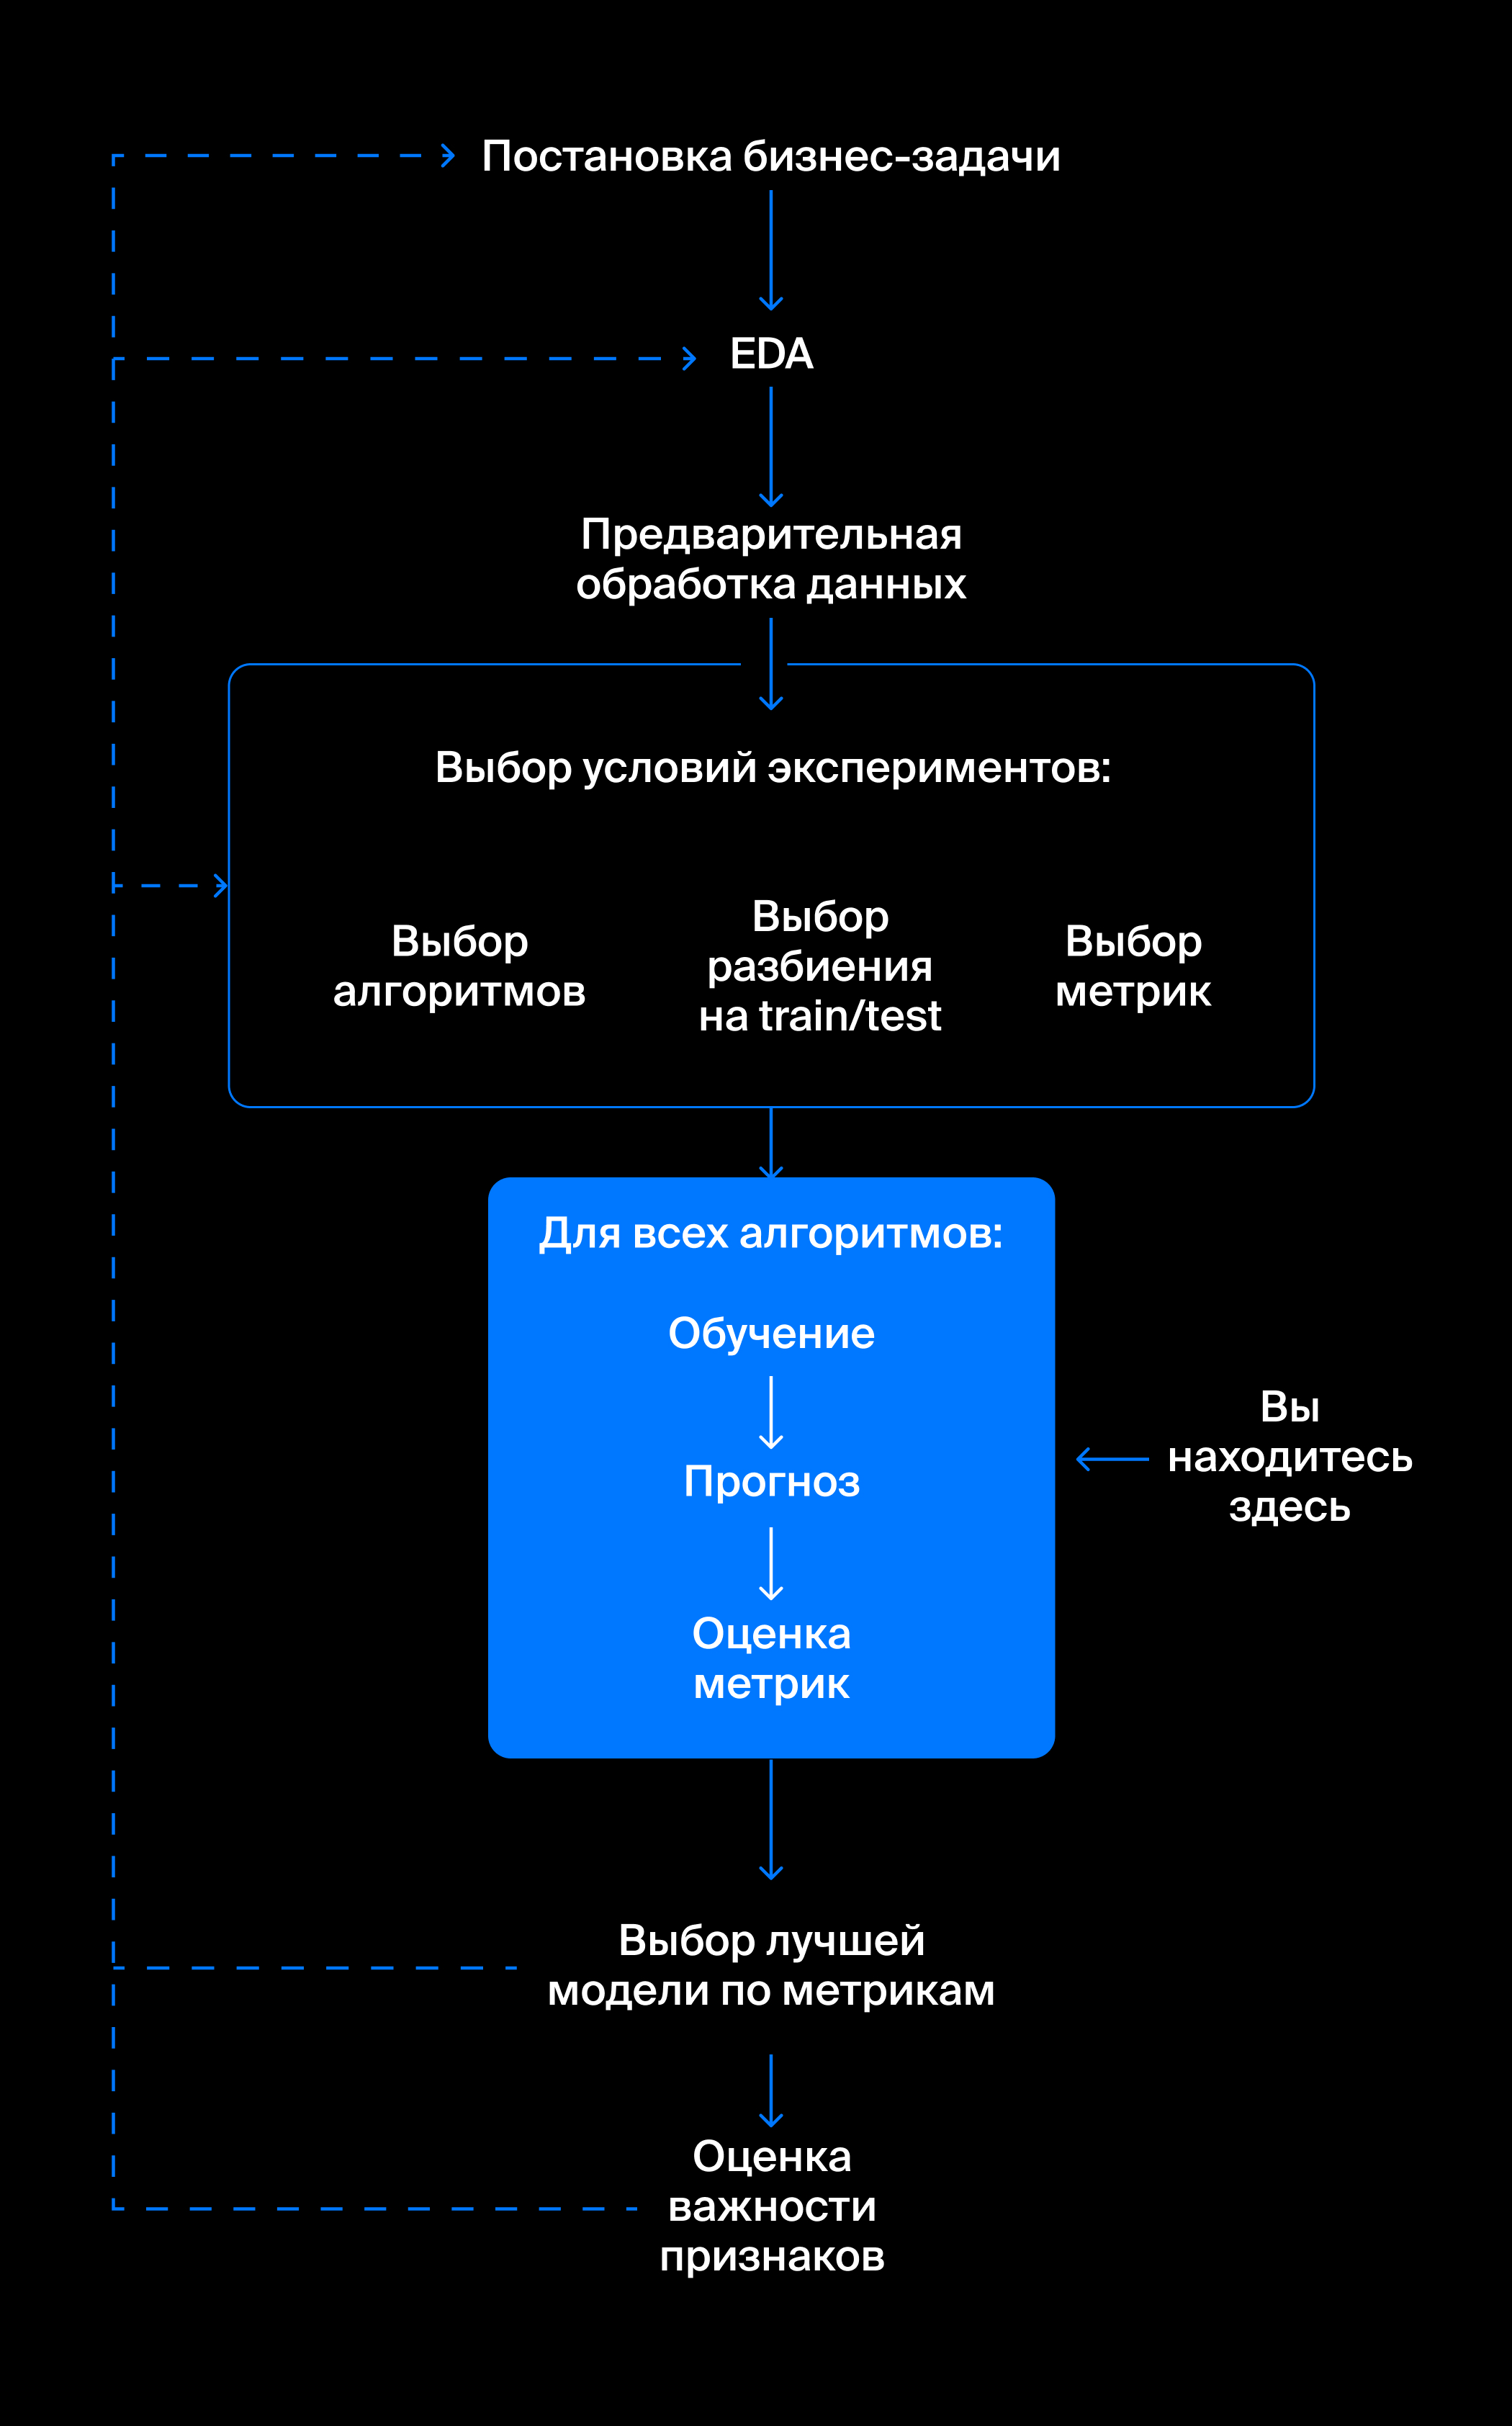

В зависимости от задачи (обучение с учителем или без, задача регрессии или классификации) и особенностей алгоритмов, последовательности шагов могут быть разными. Однако есть общие базовые принципы.

* **Постановка задачи**

Определяет дальнейшую судьбу вашей модели. На этом этапе вы переводите определённую бизнес-задачу в плоскость математики, аналитических инструментов и машинного обучения. Убедитесь, что вы хорошо понимаете стоящую перед бизнесом проблему — от этого зависит выбор модели, алгоритма и метрик. 

* **EDA**

Прежде чем отправить данные на вход модели и получить прогнозы, проводят «разведку данных» — EDA.
На этом этапе вы изучаете распределения отдельных признаков и целевой переменной, строите корреляции между величинами, исследуете специфику датасета. Бывает полезно построить график оценки плотности:

`sns.kdeplot(df['feature_1'])`

Для оценки признаков стоит посчитать корреляцию и построить хитмэп:

```
# корреляционная матрица

corr_m = df.corr()

# нарисуем heatmap

plt.figure(figsize=(15,15))
sns.heatmap(corr_m, square=True, annot=True)
plt.show()
```

Разведка данных позволит сформулировать первые гипотезы относительно качества данных и аномалий в них. Уже на этом шаге можно предположить, какие признаки станут ключевыми для модели, а какими можно и даже нужно пренебречь. EDA способен вдохновить вас на генерацию новых признаков на основе имеющихся. Такой анализ важен с точки зрения как бизнеса, так и качества будущей модели. Вы погрузитесь в природу данных, увидите за цифрами смысл и сделаете ценные предположения. 

* **Подготовка данных**

Когда в вашем распоряжении пара часов, а построить базовую модель (англ. baseline, «базовый уровень») нужно срочно, без подготовки данных можно обойтись. Однако на практике данные часто предобрабатывают, а именно: 

- обрабатывают пропущенные значения;
- преобразуют отдельные признаки (например, переводят категориальные признаки в количественные);
- нормализуют или стандартизируют данные;
- создают новые признаки (фичи) на основе уже существующих. Этот этап ещё называют feature engineering (англ. «проектирование признаков»), и иногда он может вывести вашу модель на совершенно новый уровень качества.

* **Выбор валидационной стратегии**

В зависимости от типа данных и особенностей задачи, на этом этапе следует выбрать способ формирования валидационного множества.
Также на этом шаге важно убедиться, что распределение величин на обучающей выборке близко к тому, с которым модель будет работать в реальности. Иначе всё это не имеет смысла.

* **Выбор алгоритма**

В зависимости от типа задач (с учителем или без) и поставленной проблемы, у вас есть целый арсенал различных алгоритмов со своими достоинствами и недостатками. Одни алгоритмы точнее, но их сложно интерпретировать; другие — быстрые, но притом слабее. Вот основные критерии выбора алгоритма:

- Точность;
- Скорость;
- Интерпретируемость;
- Индивидуальные особенности алгоритмов: на разных типах признаков они работают по-разному.

Даже у самого простого алгоритма есть множество настраиваемых параметров. Иногда они могут повлиять на качество и скорость обучения вашей модели. Чаще всего выбор параметров происходит итеративно. Вы обучаете модель с одними параметрами, оцениваете метрики, видите, что они так себе — меняете параметры, снова обучаете и проверяете качество.

* **Выбор метрик**

Прежде чем обучать алгоритм, определитесь, как будете оценивать его качество. 

Для каждого типа задач (классификация, регрессия, кластеризация) есть стандартный набор метрик. Однако важно не просто «прогнать» результаты через этот набор, а понять, какая метрика лучше всего отражает суть бизнес-процесса.

На этом же шаге полезно узнать, какие способы решения задачи уже применяют в компании. Это позволит честно оценить, действительно ли машинное обучение даёт вам преимущество в сравнении с более консервативными инструментами

* **Обучение и прогнозирование**

Вы прошли все шаги, дальше вступает алгоритм с традиционным fit-predict. На стадии fit вы передаёте ему подготовленную порцию данных (train-выборку), он на ней обучается и строит взаимосвязи между признаками.

Переходим к predict. У вас осталась отложенная порция данных, для которых вы знаете признаки и ответы. На этом этапе вы берёте только признаки, передаёте их на вход обученной модели и сохраняете предсказанные значения.

* **Оценка качества результатов и выбор лучшей модели**

На этом шаге вы определяете, насколько спрогнозированные вами значения для объектов из валидационной выборки отличаются от реальных. Часто оценивают не один, а несколько алгоритмов и на основании выбранных метрик выбирают лучший.

* **Оценка важности признаков**

Вы выбрали самый успешный алгоритм, который показывает лучшие в сравнении с baseline и другими алгоритмами результат. Чаще всего этого недостаточно, чтобы начать использовать вашу модель в бою. Нужно ещё раз убедиться, что модель отразила правильные паттерны и взаимосвязи между данными. Как это сделать? Например, применив **анализ важности признаков**. Этот набор подходов позволяет оценить не только **что** предсказала модель, но и **почему**. Оценка важности признаков позволяет коллегам из других подразделений поверить в модель и взять её на вооружение.

* **Что дальше?**

Вы нашли данные, преобразовали их, разделили на обучающую и валидационную выборки, выбрали несколько подходящих алгоритмов. Дальше fit-predict. Выбрали лучшую модель, проинтерпретировали важность признаков и даже сами поверили в то, что она работает. Вы прекрасны! Внедряем модель в текущие рабочие процессы и реализуем в продуктивной среде?

На самом деле всё не так просто: вы проходите пайплайн один раз, а потом чаще всего возвращаетесь на предыдущие этапы, что-то меняете и смотрите, как преобразился результат. Это совершенно нормально. Как нормально и то, что иногда, как бы хороши ни были вы, данные и модель, в применении машинного обучения смысла никакого.


### Почему машинное обучение — не панацея?

Узнаем не менее важную вещь — в каких случаях применять ML не надо.

Прежде чем лихо отправить данные в модель машинного обучения, ответьте на важные вопросы:

- достаточно ли у вас большая выборка?
- насколько качественные данные?
- способна ли ваша модель дать правдоподобный прогноз?


* **Выборка**

Однозначного ответа на вопрос, что считать достаточно большой выборкой, нет. Это зависит от каждого конкретного случая. Часто, определяя размер выборки, основываются на эмпирических правилах, то есть выведенных из опыта. Они учитывают количество признаков, разнообразие значений целевой переменной и специфику самих алгоритмов. 

Первое правило гласит, что минимально необходимое количество наблюдений в выборке линейно связано с числом признаков. То есть минимальная выборка может быть рассчитана по формуле `s = k * n`, где `n` — число признаков для каждого наблюдения, а `k` — коэффициент, который из опыта часто считают равным 10. Если на одного пользователя приходится 20 признаков, то для обнаружения зависимостей нужно как минимум 200 пользователей. А вот если признаков 150, то и тысячи пользователей не хватит. 

Другое эмпирическое правило подходит для задач кластеризации и предлагает отталкиваться от количества целевых кластеров. Чем больше кластеров, тем сложнее научиться различать их на основании доступных признаков. Если рассчитывать минимально необходимое число наблюдений по предыдущему эмпирическому правилу и увеличивать при этом в `n` раз число целевых классов, придётся увеличить полученное значение во столько же раз.

Скажем, вы аналитик в стартапе. Сервис собирает пользовательские данные из социальных сетей. В распоряжении множество признаков клиентов: от демографических до активности на вашем сайте. На основе этой ценной информации директор по продукту попросил вас сегментировать пользователей. Одна проблема — компания недавно вышла на рынок, и у неё всего 400 клиентов. 

Можно ли «поделить» 400 пользователей на 10 кластеров, когда в признаках у вас 234 показателя? Скорее всего, вы столкнётесь с проклятием размерности. Числа наблюдений будет недостаточно, чтобы сделать группировку в пространстве всего множества признаков. 

Последнее правило предлагает отталкиваться от семейства алгоритмов. Например, нейронные сети плохо работают на малых данных. Им подавай выборки в сотни тысяч наблюдений.

Общий вывод такой: если число клиентов вашего бизнеса или наблюдений не выходит на порядки тысяч, машинное обучение не слишком нужно. Ваша сила — в индивидуальном подходе и эксклюзивности!

* **Качество данных**

Допустим, у вас миллионы наблюдений. Такой миллионер — мечта любой модели! Но всегда ли количество решает? Что если на самом деле ваши данные не несут ожидаемого объёма информации, чтобы выстроить хотя бы какие-то взаимосвязи? 

В машинном обучении работает правило GIGO (англ. Garbage In, Garbage Out, «Мусор на входе — мусор на выходе»). Если на вход модели передать некачественные данные, даже при правильном выборе алгоритма на выходе получите неверные результаты. Вот потенциальные проблемы с качеством данных:

- шум;
- пропуски;
- ошибки и выбросы;
- изменение в распределении данных со временем.

На этапе EDA узнайте, есть ли такие проблемы в вашем датасете. Часть из них можно решить методами предобработки. 

Однако бывает, что вы не можете повлиять на качество данных. Например, если для какого-то признака доля пропущенных значений больше половины и наблюдения не связаны во времени — не выйдет «протянуть» значение с предыдущих периодов — скорее всего, придётся избавиться от такой переменной. 

Ещё один пример из практики — изменчивость данных. Важное правило применимости моделей машинного обучения: распределения признаков на обучающей, валидационной и тестовой выборках должны быть похожими. Иначе модель будет просто бесполезной. 

Скажем, вы обучили модель, предсказывающую определённый дефект на производстве на основании данных с датчиков станка. Она проработала месяц после внедрения. Однако внезапно стала выдавать совсем не то, что нужно. Что произошло? Станок модернизировали или вовсе заменили на новый — распределение величин и даже их набор поменялся. Единственное, что вы можете сделать — подождать, когда накопятся данные для нового оборудования и переобучить модель.

* **Низкое качество модели**

Бывает и данных много, и качество у них отличное, но метрики сообщают, что на основании имеющихся данных вы не можете прогнозировать выбранную целевую переменную. Причина в том, что все ваши признаки никак не связаны с вашей целевой переменной, и, соответственно, по ним прогнозировать интересующую вас величину нельзя. 

Так, данные о продажах в салонах российского оператора сотовой связи никак не помогут вам для прогнозирования популяции пингвинов в ЮАР, какими бы точными они ни были. Скорее всего, вы получите относительные ошибки на уровне сотен процентов, а R-квадрат будет близким к 0. 

Другой пример — очень шумные, или волатильные данные. Среди таких почти невозможно уловить «полезный сигнал». В таких случаях машинное обучение не годится, и применяют другие методы математического моделирования

# Алгоритмы машинного обучения

## Линейная регрессия и функция ошибки

## Градиентный спуск

## Предобработка. Масштабирование признаков

## Регуляризация

## Реализация линейных моделей

## Метрики регрессии

## Логистическая регрессия

## Метрики классификации. Работа с метками

## Метрики классификации. Вероятности

## Порог и баланс классов

## Дерево принятия решений

## Ансамбли деервьев: случайный лес и градиентный бустинг

## Алгоритмы обучения без учителя: кластеризация

## Расстояние

## K-Means и агломеративная иерархическая кластеризация

## Метрики для задач обучения без учителя